In [1]:
using Pkg
Pkg.activate("SchrodingerEquationSolver")
include("SchrodingerEquationSolver.jl")

  Activating new project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver/src/SchrodingerEquationSolver`


Main.SchrodingerEquationSolver

In [2]:
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.EigenvalueFinders as EigenvalueFinders

In [3]:
using Plots

In [14]:
r_min::Float64=0.0;
r_max::Float64=50.0;
Z::Int64=2;
l::Int64=1;


In [15]:
#grid= Grids.uniform_grid(r_min, r_max, N);
grid= ses.Grids.exponential_grid(r_max, Z);
N::Int64=sizeof(grid)[1];


In [16]:


v_colu= Potentials.coulomb_potential(Z, grid);
v_angu= Potentials.angular_potential(l, grid);
v_effe= v_colu + v_angu;

In [17]:

E_max::Float64=-0.05;
E_min::Float64=-2.2;
E_N::Int64=1000;
E_grid= Grids.uniform_grid(E_min, E_max, E_N);

In [18]:
E_intervals, bad_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid,InitialConditions.atom, l);
E_intervals

DomainError: DomainError with the effective potential has no turning points 
        for the proposed energy eigenvalue, this means v_effe - E has no zeroes:


In [19]:
E_intervals

6-element Vector{Tuple{Float64, Float64}}:
 (-2.002002002002002, -1.99984984984985)
 (-0.501951951951952, -0.4997997997997998)
 (-0.22432432432432425, -0.2221721721721721)
 (-0.12532532532532503, -0.12317317317317311)
 (-0.08013013013012982, -0.0779779779779779)
 (-0.05645645645645647, -0.05430430430430411)

In [9]:
bad_intervals

Tuple{Float64, Float64}[]

In [10]:
numb_solu::Int64= size(E_intervals)[1];
eigen_list::Vector{Float64}=zeros(numb_solu);
u_wave_functions::Vector{Vector{Float64}}= [zeros(N) for _ in 1:numb_solu];

In [11]:
for (i, ei_interval) in enumerate(E_intervals)
    u_temp, ei_temp= EigenvalueFinders.illinois_eigenvalue_finder(ei_interval, v_effe, grid,InitialConditions.atom);
    u_wave_functions[i]=u_temp;
    eigen_list[i]= ei_temp;
end

In [12]:
eigen_list

6-element Vector{Float64}:
 -2.000001769317099
 -0.5000004420743518
 -0.22222241904176254
 -0.1250001107933191
 -0.08000005439187297
 -0.055534249768899

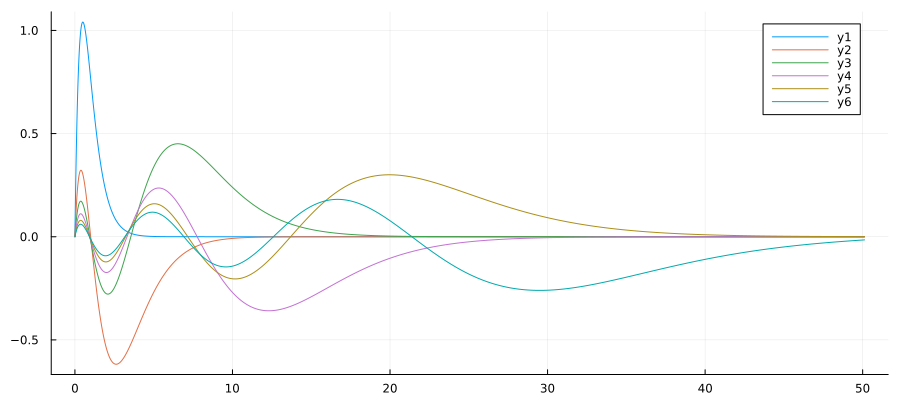

In [13]:
plot!(grid, u_wave_functions)
plot!(size=(900,400))

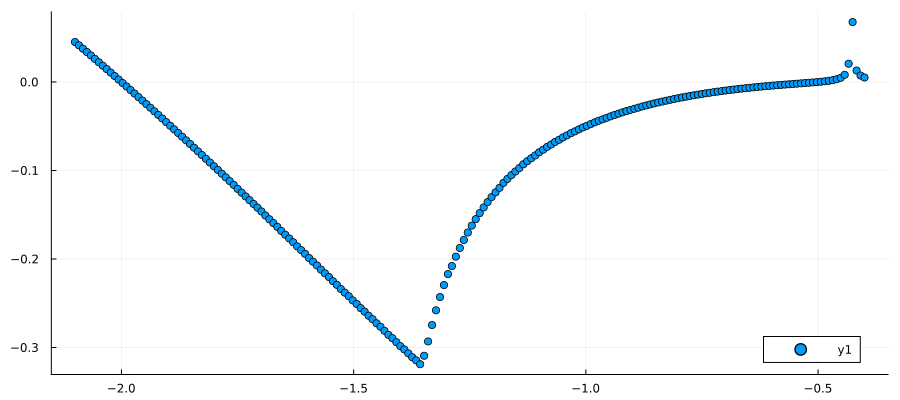

In [10]:
merg_valu_of_E=zeros(Float64, E_N);
for (i, ei) in enumerate(E_grid)
    init_valu1_fwrd, init_valu2_fwrd,
    init_valu1_bwrd, init_valu2_bwrd =InitialConditions.atom(grid, ei, l);
    u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
    init_valu2_bwrd, v_effe, grid);
    merg_valu_of_E[i]=merge_value;
end
scatter(E_grid, [merg_valu_of_E])
plot!(size=(900,400))

In [11]:
ener_indx= MathUtils.indices_of_zeros_finder(merg_valu_of_E);

In [12]:
ener_indx[1]

12

In [13]:
abs(merg_valu_of_E[ener_indx[1]+1]-merg_valu_of_E[ener_indx[1]])

0.003935974353017263

In [19]:
0.51*(abs(merg_valu_of_E[ener_indx[1]+1]-merg_valu_of_E[ener_indx[1]+2]) + abs(merg_valu_of_E[ener_indx[1]]-merg_valu_of_E[ener_indx[1]-1]))

0.004014564713293049

In [15]:
abs(merg_valu_of_E[ener_indx[1]]-merg_valu_of_E[ener_indx[1]-1])

0.003919938650547045